<a href="https://colab.research.google.com/github/samp3209/capstone/blob/main/Blip2_Logo_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download model
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install transformers==4.15.0 timm==0.4.12 fairscale==0.4.4
    !git clone https://github.com/salesforce/BLIP
    %cd BLIP

Running in Colab.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 73.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 82.6 MB/s eta 0:00:00
  Created wheel for fairscale: filename=fairscale-0.4.4-py3-none-any.whl size=292853 sha256=ba9d1ed86738f55c4fa4e255541b2f52d3a3b3899b3f239caa1c73905ea8a326
  Stored in directory: /r

In [15]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Blip Demo single image


In [3]:
#Demo image from blip
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))
    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

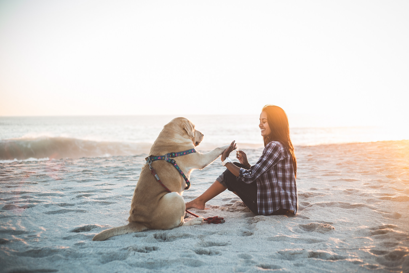

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.97G/1.97G [00:11<00:00, 186MB/s]


reshape position embedding from 196 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a woman and her dog on the beach


In [4]:
#Demo image from blip
from models.blip import blip_decoder

image_size = 384
image = load_demo_image(image_size=image_size, device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'
    
model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

with torch.no_grad():
    # beam search
    caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5) 
    # nucleus sampling
    # caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5) 
    print('caption: '+caption[0])

# Take images from google drive folder and caption them


In [2]:
#Link google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

# Define the path of the folder containing the images
folder_path = "/content/drive/MyDrive/beaverlogos/" 

# Create an empty list to store the file paths of the images
file_paths = []

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
  # Check if the file is an image (ends with .jpg, .jpeg, or .png)
  if filename.endswith(('.jpg', '.jpeg', '.png')):
    # Get the file path of the image
    file_path = os.path.join(folder_path, filename)
    # Append the file path to the list
    file_paths.append(file_path)

# Print the file paths of the images
print(file_paths)

['/content/drive/MyDrive/beaverlogos/a professionally designed chauncey logo, beaver, centered, cute, 4k hd, trending on artstation, chauncey, animated chauncey on all fours, icon, sym.png', '/content/drive/MyDrive/beaverlogos/animated college chauncey the beaver mascot in a green and blue color scheme. The background should be a mix of green and blue color.png', '/content/drive/MyDrive/beaverlogos/digital illustration, cute brown beaver, college beaver mascot, navy blue background, chauncey beaver and that it looks friendly and huggable, ring around chauncey.png', '/content/drive/MyDrive/beaverlogos/digital illustration, cute chauncey with long tail, college mascot with paws in the air, navy blue background, college beaver mascot looks friendyl.png', '/content/drive/MyDrive/beaverlogos/digital illustration, cute skinny chauncey the beaver running with rugby ball, college beaver mascot playing rugby, navy blue background,  beaver and that it looks friendly.png', '/content/drive/MyDrive

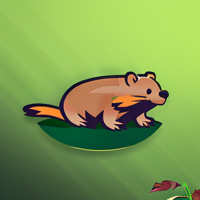

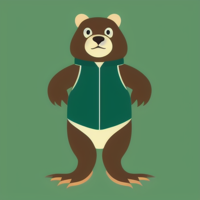

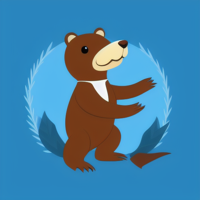

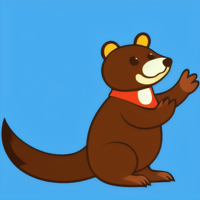

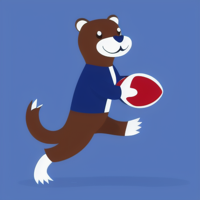

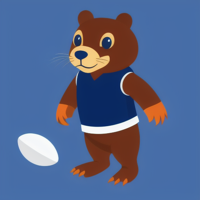

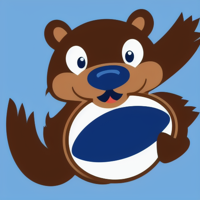

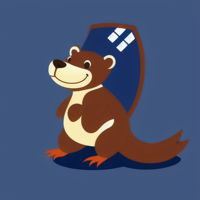

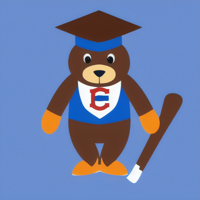

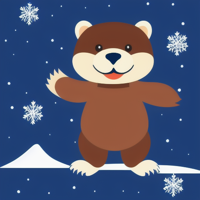

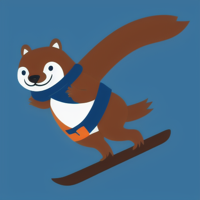

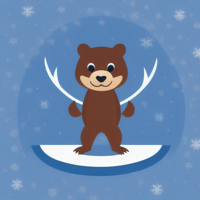

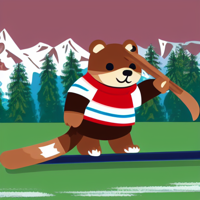

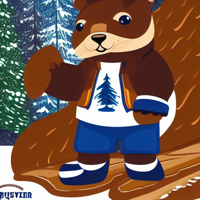

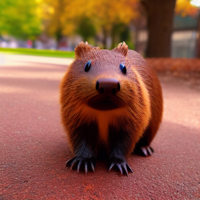

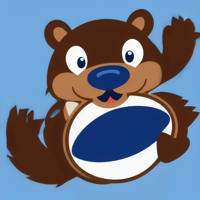

In [8]:
#opens image from path then stores to list as pil image
image_list = []
for path in file_paths:
  with Image.open(path).convert('RGB') as img:
      image_list.append(img)
      display(img.resize((200,200)))

In [12]:
#function for loading images and then transforming them to tensors for captioning
def load_images(raw_image):
  w,h = raw_image.size
  image_size = 512
  #display(raw_image.resize((w//5,h//5)))
    
  transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
  image = transform(raw_image).unsqueeze(0).to(device)   
  return image

In [16]:
#transforms inputs and stores them to list 
inputs = []
for image in image_list:
    x = load_images(image)
    inputs.append(x)

In [18]:
#blips through images in input and stores caption to a list
captions = []
from models.blip import blip_decoder

image_size = 512
for image in inputs:
      model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'
      model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
      model.eval()
      model = model.to(device)

      with torch.no_grad():
          # beam search
          caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5)
          # nucleus sampling
          # caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5) 
          print('caption: '+caption[0])
          captions.append(caption)

reshape position embedding from 196 to 1024
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a squirrel sitting on a leaf
reshape position embedding from 196 to 1024
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a brown bear wearing a green vest
reshape position embedding from 196 to 1024
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a brown bear with a blue background
reshape position embedding from 196 to 1024
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a cartoon beaver
reshape position embedding from 196 to 1024
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a bear pl

In [19]:
#Prompts blip with questions about the image 
q1s = []
q2s = []
q3s = []
q4s = []
q5s = []
from models.blip_vqa import blip_vqa

image_size = 512
model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'
model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)
for image in inputs:   
    question = 'what is the style of the image?'
    question2 = 'what are the colors predominant in the image?'
    question3 = 'what is the mood of the image?'
    question4 = 'what is the subject doing in this image?'
    question5 = 'where does this image take place?'
    with torch.no_grad():
        answer = model(image, question, train=False, inference='generate') 
        answer2 = model(image, question2, train=False, inference='generate') 
        answer3 = model(image, question3, train=False, inference='generate') 
        answer4 = model(image, question4, train=False, inference='generate') 
        answer5 = model(image, question5, train=False, inference='generate') 

        print('answer: '+answer[0])
        q1s.append(answer[0])
        q2s.append(answer2[0])
        q3s.append(answer3[0])
        q4s.append(answer4[0])
        q5s.append(answer5[0])

100%|██████████| 1.35G/1.35G [01:03<00:00, 22.8MB/s]


reshape position embedding from 900 to 1024
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: cartoon
answer: grumpy
answer: cartoon


In [38]:
new_captions = []
for i in range(len(captions)):
  nc =  captions[i] + ',' + q1s[i] + ',' + q2s[i] + ',' + q3s[i] + ',' + q4s[i] + ',' + q5s[i] + '.png'
  new_captions.append(nc)


In [40]:
#matches the caption to the file path of the images to re name file to caption
path = '/content/drive/MyDrive/beaverlogos/'
for i in range(len(file_paths)):
  new_name = path + new_captions[i]
  old_name = file_paths[i]
  os.rename(old_name,new_name)

Congrats now you can train your images